1. **В ноутбуці завантаж таблицю з файлу `applications.csv` в Pandas DataFrame та почисти дані:**

   - Прибери дублікати `applicant_id`
   - В полі `External Rating` заповни відсутні значення нулями  
   - В полі `Education level` заповни відсутні значення текстом “Середня”

2. **Додай до цього DataFrame дані з файлу `industries.csv`, а саме — рейтинги індустрій.**

3. **Розрахуй рейтинг заявки за наступними умовами:**

   - Рейтинг має бути числом від 0 до 100
   - Рейтинг — сума оцінок заявки по 6 критеріях
   - Рейтинг дорівнює нулю, якщо відсутнє значення `Amount` або якщо `External Rating` дорівнює нулю

   **З чого складається рейтинг:**

   - Якщо вік заявника між 35 та 55 — _додається 20 балів_
   - Якщо заявка була подана **не у вихідні** — _додається 20 балів_
   - Якщо заявник **одружений** — _додається 20 балів_
   - Якщо заявник знаходиться в **Києві чи області** — _додається 10 балів_
   - Значення `Score` з `industries.csv` — _додається (0–20 балів)_
   - Якщо `External Rating ≥ 7` — _додається 20 балів_
   - Якщо `External Rating ≤ 2` — _віднімається 20 балів_

   > 💡 *Підказка:* булеві масиви можна множити на числа, наприклад:  
   > `(df['Age'] >= 35) * 20` → отримаєш масив із чисел **0 або 20**, які потім можна додавати між собою і зберегти як новий стовпчик.

4. **В результуючій таблиці залиш лише заявки з рейтингом > 0** — ці заявки вважатимуться прийнятими.

5. **Прийняті заявки згрупуй за тижнем подачі та виведи середній рейтинг у кожен тиждень.**
иждень.

import pandas as pd

In [1]:
import pandas as pd

In [2]:
df_apps = pd.read_csv('applications(2.0).csv')
df_industries = pd.read_csv('industries(2.0).csv')

In [17]:
df_apps.head()

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id
0,11.30.2022 10:26:37,12000.0,29,Чоловік,Blockchain,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3
1,11.30.2022 10:26:39,NaN,36,Чоловік,Public services / Government,Single,3.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,63dfcf8e6904186650d6814279fbe42f
2,11.30.2022 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498
3,11.30.2022 10:27:31,1500.0,23,Жінка,Telecom,Single,0.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,5847ac62cc9eac5e323c2517dcc91ad1
4,11.30.2022 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3


In [18]:
df_apps.shape

(13315, 10)

In [21]:
df_industries.shape

(37, 2)

In [5]:
df_industries.sample(5)

,Industry,Score
6,Media,5
0,Blockchain,0
14,Fintech / Banking,20
9,Edtech / Education,15
8,Dating,5


In [5]:
# Прибери дублікати applicant_id
df_apps.drop_duplicates(subset='applicant_id', keep='first', inplace=True)

In [20]:
df_apps.shape

(13278, 10)

In [6]:
# В полі External Rating заповни відсутні значення нулями
df_apps['External Rating'] = df_apps['External Rating'].fillna(0)
df_apps

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id
0,11.30.2022 10:26:37,12000.0,29,Чоловік,Blockchain,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3
1,11.30.2022 10:26:39,NaN,36,Чоловік,Public services / Government,Single,3.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,63dfcf8e6904186650d6814279fbe42f
2,11.30.2022 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498
3,11.30.2022 10:27:31,1500.0,23,Жінка,Telecom,Single,0.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,5847ac62cc9eac5e323c2517dcc91ad1
4,11.30.2022 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3
...,...,...,...,...,...,...,...,...,...,...
13310,01.09.2023 11:01,12000.0,25,Чоловік,Medtech / Healthcare,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Харків чи область,01908b949a6a1eb44d1ee013ec377f9d
13311,01.09.2023 11:14,10500.0,28,Чоловік,Blockchain,Married,5.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,6599ba629cfcfe8ac42c7d31c13f62de
13312,01.09.2023 11:19,5790.0,25,Чоловік,Blockchain,Married,3.0,"Вища (бакалавр, спеціаліст, магістр)",Дніпро чи область,e57f181bec5b11870a541c43d9b960f7
13313,01.09.2023 11:28,13500.0,31,Чоловік,Mobile,Single,8.0,Середня,Одеса чи область,a340c62a1226509949ef60df10a7d726


In [7]:
# В полі Education level заповни відсутні значення текстом “Середня”
df_apps['Education level'] = df_apps['Education level'].fillna('Середня')

In [37]:
#Додай до цього DataFrame дані з файлу industries.csv, а саме — рейтинги індустрій.
df_apps_new = pd.merge(left = df_apps, right = df_industries, on = 'Industry', how = 'left')
df_apps_new

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score
0,11.30.2022 10:26:37,12000.0,29,Чоловік,Blockchain,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3,0
1,11.30.2022 10:26:39,NaN,36,Чоловік,Public services / Government,Single,3.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,63dfcf8e6904186650d6814279fbe42f,20
2,11.30.2022 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498,10
3,11.30.2022 10:27:31,1500.0,23,Жінка,Telecom,Single,0.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,5847ac62cc9eac5e323c2517dcc91ad1,15
4,11.30.2022 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3,15
...,...,...,...,...,...,...,...,...,...,...,...
13273,01.09.2023 11:01,12000.0,25,Чоловік,Medtech / Healthcare,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Харків чи область,01908b949a6a1eb44d1ee013ec377f9d,15
13274,01.09.2023 11:14,10500.0,28,Чоловік,Blockchain,Married,5.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,6599ba629cfcfe8ac42c7d31c13f62de,0
13275,01.09.2023 11:19,5790.0,25,Чоловік,Blockchain,Married,3.0,"Вища (бакалавр, спеціаліст, магістр)",Дніпро чи область,e57f181bec5b11870a541c43d9b960f7,0
13276,01.09.2023 11:28,13500.0,31,Чоловік,Mobile,Single,8.0,Середня,Одеса чи область,a340c62a1226509949ef60df10a7d726,15


In [9]:
# Рейтинг заявки

In [39]:
if_1 = (df_apps_new.Age >= 35) & (df_apps_new.Age <= 55) * 20

In [40]:
df_apps_new['Applied at'].sample(3)

9734    12.16.2022 16:18:13
3970       12.04.2022 00:38
1239    11.30.2022 16:46:36
Name: Applied at, dtype: object

In [41]:
df_apps_new['Applied at'] = pd.to_datetime(df_apps_new['Applied at'], format = 'mixed')
df_apps_new['Applied at'].sample(3)

296    2022-11-30 11:40:18
3120   2022-12-02 11:43:00
4885   2022-12-05 21:08:00
Name: Applied at, dtype: datetime64[ns]

In [42]:
df_apps_new['Applied at'].dt.weekday

0        2
1        2
2        2
3        2
4        2
        ..
13273    0
13274    0
13275    0
13276    0
13277    0
Name: Applied at, Length: 13278, dtype: int32

In [46]:
if_2 = (df_apps_new['Applied at'].dt.weekday < 5) * 20
if_3 = (df_apps_new['Marital status'] == 'Married') * 20
if_4 = (df_apps_new['Location'].str.contains('Київ чи область')) * 10
if_5 = df_apps_new.Score
if_6 = (df_apps_new['External Rating'] >= 7) + 20
if_7 = (df_apps_new['External Rating'] <= 2) - 20

In [47]:
df_apps_new['Rating'] = if_1 + if_2 + if_3 + if_4 + if_5 + if_6 + if_7
df_apps_new

/tmp/ipykernel_137/2348216377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apps_new['Rating'] = if_1 + if_2 + if_3 + if_4 + if_5 + if_6 + if_7


,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score,Rating
0,2022-11-30 10:26:37,12000.0,29,Чоловік,Blockchain,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3,0,21.0
2,2022-11-30 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498,10,40.0
3,2022-11-30 10:27:31,1500.0,23,Жінка,Telecom,Single,0.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,5847ac62cc9eac5e323c2517dcc91ad1,15,36.0
4,2022-11-30 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3,15,35.0
5,2022-11-30 10:27:38,16500.0,31,Чоловік,E-commerce,Single,8.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,f720bf9c5c4c3e10a8568c1699847696,15,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13271,2023-01-09 03:41:00,16500.0,33,Чоловік,E-commerce,Married,10.0,Дві вищі,Харків чи область,f7ad9effd852b2f8d59c7c94218aee3d,15,56.0
13272,2023-01-09 10:14:00,3000.0,28,Чоловік,Інша,Single,5.0,Середня,Київ чи область,d8934c4bd85253bb2a21405c491d720b,10,40.0
13273,2023-01-09 11:01:00,12000.0,25,Чоловік,Medtech / Healthcare,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Харків чи область,01908b949a6a1eb44d1ee013ec377f9d,15,35.0
13275,2023-01-09 11:19:00,5790.0,25,Чоловік,Blockchain,Married,3.0,"Вища (бакалавр, спеціаліст, магістр)",Дніпро чи область,e57f181bec5b11870a541c43d9b960f7,0,40.0


In [52]:
df_apps_new = df_apps_new[(df_apps_new['Rating'] > 0) & (df_apps_new['Rating'] <= 100)]
df_apps_new

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score,Rating
0,2022-11-30 10:26:37,12000.0,29,Чоловік,Blockchain,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3,0,21.0
2,2022-11-30 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498,10,40.0
4,2022-11-30 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3,15,35.0
5,2022-11-30 10:27:38,16500.0,31,Чоловік,E-commerce,Single,8.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,f720bf9c5c4c3e10a8568c1699847696,15,46.0
6,2022-11-30 10:27:42,4200.0,30,Чоловік,Media,Married,1.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,0aaf59fb3ef90f50ccd4800312e5c271,5,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13271,2023-01-09 03:41:00,16500.0,33,Чоловік,E-commerce,Married,10.0,Дві вищі,Харків чи область,f7ad9effd852b2f8d59c7c94218aee3d,15,56.0
13272,2023-01-09 10:14:00,3000.0,28,Чоловік,Інша,Single,5.0,Середня,Київ чи область,d8934c4bd85253bb2a21405c491d720b,10,40.0
13273,2023-01-09 11:01:00,12000.0,25,Чоловік,Medtech / Healthcare,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Харків чи область,01908b949a6a1eb44d1ee013ec377f9d,15,35.0
13275,2023-01-09 11:19:00,5790.0,25,Чоловік,Blockchain,Married,3.0,"Вища (бакалавр, спеціаліст, магістр)",Дніпро чи область,e57f181bec5b11870a541c43d9b960f7,0,40.0


In [53]:
df_apps_new.loc[
    (df_apps_new['External Rating'] == 0) | (df_apps_new['Amount'].isna()),
    'Rating'
] = 0

In [54]:
df_apps_new

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score,Rating
0,2022-11-30 10:26:37,12000.0,29,Чоловік,Blockchain,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3,0,21.0
2,2022-11-30 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498,10,40.0
4,2022-11-30 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3,15,35.0
5,2022-11-30 10:27:38,16500.0,31,Чоловік,E-commerce,Single,8.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,f720bf9c5c4c3e10a8568c1699847696,15,46.0
6,2022-11-30 10:27:42,4200.0,30,Чоловік,Media,Married,1.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,0aaf59fb3ef90f50ccd4800312e5c271,5,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13271,2023-01-09 03:41:00,16500.0,33,Чоловік,E-commerce,Married,10.0,Дві вищі,Харків чи область,f7ad9effd852b2f8d59c7c94218aee3d,15,56.0
13272,2023-01-09 10:14:00,3000.0,28,Чоловік,Інша,Single,5.0,Середня,Київ чи область,d8934c4bd85253bb2a21405c491d720b,10,40.0
13273,2023-01-09 11:01:00,12000.0,25,Чоловік,Medtech / Healthcare,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Харків чи область,01908b949a6a1eb44d1ee013ec377f9d,15,35.0
13275,2023-01-09 11:19:00,5790.0,25,Чоловік,Blockchain,Married,3.0,"Вища (бакалавр, спеціаліст, магістр)",Дніпро чи область,e57f181bec5b11870a541c43d9b960f7,0,40.0


In [55]:
# week
df_apps_new['Applied at'].dt.to_period('W')

0        2022-11-28/2022-12-04
2        2022-11-28/2022-12-04
4        2022-11-28/2022-12-04
5        2022-11-28/2022-12-04
6        2022-11-28/2022-12-04
                 ...          
13271    2023-01-09/2023-01-15
13272    2023-01-09/2023-01-15
13273    2023-01-09/2023-01-15
13275    2023-01-09/2023-01-15
13276    2023-01-09/2023-01-15
Name: Applied at, Length: 11028, dtype: period[W-SUN]

In [56]:
df_apps_new['Applied at'].dt.isocalendar().week

0        48
2        48
4        48
5        48
6        48
         ..
13271     2
13272     2
13273     2
13275     2
13276     2
Name: week, Length: 11028, dtype: UInt32

In [57]:
df_apps_new['Applied at'].dt.year

0        2022
2        2022
4        2022
5        2022
6        2022
         ... 
13271    2023
13272    2023
13273    2023
13275    2023
13276    2023
Name: Applied at, Length: 11028, dtype: int32

In [58]:
df_apps_new['year_week'] = df_apps_new['Applied at'].dt.year.astype(str) + "-" + df_apps_new['Applied at'].dt.isocalendar().week.astype(str)
df_apps_new.sample(3)

/tmp/ipykernel_137/1937249890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apps_new['year_week'] = df_apps_new['Applied at'].dt.year.astype(str) + "-" + df_apps_new['Applied at'].dt.isocalendar().week.astype(str)


,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score,Rating,year_week
1308,2022-11-30 16:53:25,16800.0,31,Чоловік,E-commerce,Single,10.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,69a0e62eece6d953a91367cfaf1c41b4,15,46.0,2022-48
2876,2022-12-01 18:53:00,7500.0,29,Жінка,Fintech / Banking,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,dbe5e93b73a763bca79f46e5c7d1c33b,20,50.0,2022-48
6388,2022-12-07 19:34:00,13500.0,26,Чоловік,Blockchain,Single,5.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,9a95196fc90ce168cb829034ab1f0d0f,0,20.0,2022-49


In [59]:
grouped_week = df_apps_new.groupby('year_week')['Rating'].mean().sort_index()
grouped_week

year_week
2022-48    45.437860
2022-49    47.807531
2022-50    47.141350
2022-51    43.293388
2022-52    47.812146
2023-1     47.619298
2023-2     41.400000
2023-52    34.000000
Name: Rating, dtype: float64

In [60]:
import seaborn as sns

In [61]:
sns.set_theme()

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='year_week'>

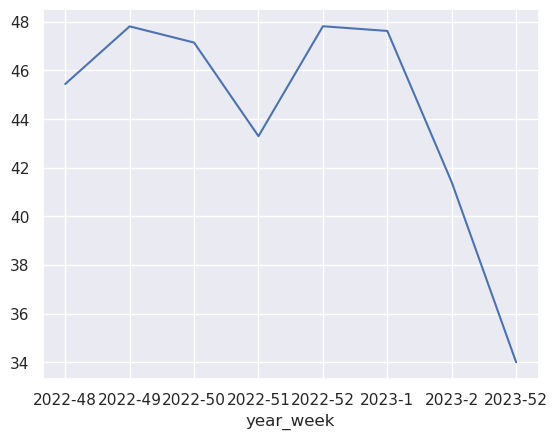

In [62]:
sns.lineplot(x = grouped_week.index, y = grouped_week.values)